# Final Project - Word Cloud

This project creates a "word cloud" from a text by writing a script.  This script will process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  

In [4]:
# Installs and Inputs needed

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension
!install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Please supply at least one subcommand: disable, enable, install, list, uninstall
install: unrecognized option '--py'
Try 'install --help' for more information.
Enabling notebook extension fileupload/extension...
      - Validating: OK


<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [5]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `Flowers for Algernon.txt` (440.13 kB)


The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. 


In [6]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    dictionary = {}
    punctuation_free = ""
    
    for letter in file_contents.lower():
        if letter not in punctuations:
            punctuation_free = punctuation_free + letter
        
    
    for word in punctuation_free.split():
        if word not in uninteresting_words and word.isalpha():
            if word not in dictionary:
                dictionary[word] = 0
                
            dictionary[word] += 1
        
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(dictionary)
    return cloud.to_array()

Word cloud generator script below

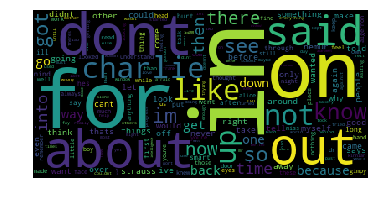

In [7]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()